In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

from tvb.simulator.lab import *


/Users/yilinliu/anaconda3/lib/python3.7/site-packages/tvb/datatypes/surfaces.py:63: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


#### Load SC data

In [2]:
sc_data = scipy.io.loadmat('./data/sc_ifod2act_fs86_997subj.mat')

In [3]:
sc_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'subject', 'ismissing', 'orig', 'volnorm', 'sift2', 'sift2volnorm'])

In [4]:
sc_data['subject'][0][0]

array(['100206'], dtype='<U6')

#### Pairwise Euclidean distances

In [5]:
# dist_data = scipy.io.loadmat("./data/fs86_pairwise_distances.mat")
# dist_data.keys()

In [6]:
track_len_dat = scipy.io.loadmat("./data/fs86_tracklengths_ifod2act.mat")
track_len_dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'D', 'centroids', 'labels', 'tracklength'])

In [7]:
track_len_dat['tracklength'].shape

(86, 86)

<AxesSubplot:>

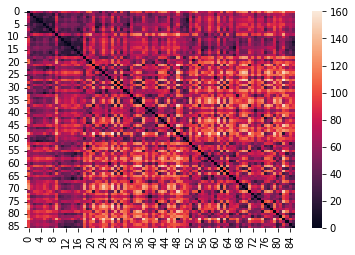

In [8]:
sns.heatmap(track_len_dat['D'])

In [9]:
np.diagonal(track_len_dat['D'])
# np.diagonal(tvb_conn.tract_lengths)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [10]:
track_len_dat['centroids'].shape

(86, 3)

In [11]:
track_len_dat['labels']

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
        65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
        81, 82, 83, 84, 85, 86]])

In [12]:
sc_mat0 = sc_data['sift2volnorm'][0][0]
sc_mat0

array([[5.80434186e+00, 1.99935587e-01, 1.42510920e-02, ...,
        0.00000000e+00, 5.17680555e-05, 5.77559950e-05],
       [1.99935587e-01, 1.78980100e+00, 2.33301115e+00, ...,
        0.00000000e+00, 2.50298281e-03, 3.50130742e-03],
       [1.42510920e-02, 2.33301115e+00, 1.12483799e+00, ...,
        0.00000000e+00, 2.34883863e-04, 1.07637167e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.35087009e+00, 0.00000000e+00, 1.19829222e+00],
       [5.17680555e-05, 2.50298281e-03, 2.34883863e-04, ...,
        0.00000000e+00, 1.90651122e+00, 3.32479880e-01],
       [5.77559950e-05, 3.50130742e-03, 1.07637167e-03, ...,
        1.19829222e+00, 3.32479880e-01, 1.97942063e+00]])

<AxesSubplot:>

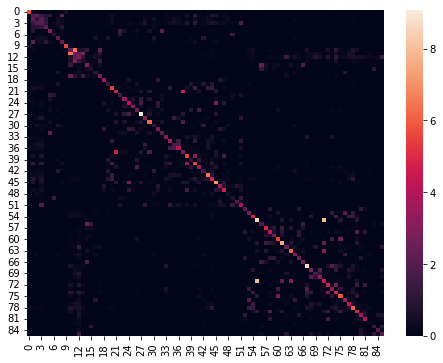

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(sc_mat0)

<AxesSubplot:>

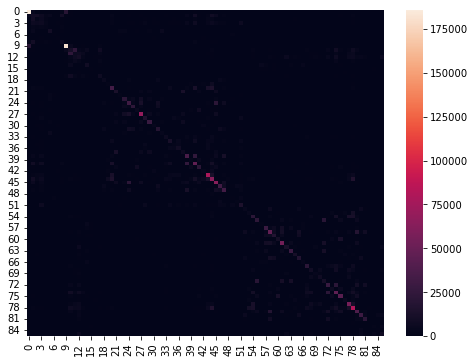

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(sc_data['sift2'][0][0])

In [15]:
models.WilsonCowan(variables_of_interest=('E', 'I',), a_e=np.random.uniform(0, 1, 86))

,value
"P [min, median, max]","[0, 0, 0]"
P dtype,float64
P shape,"(1,)"
"Q [min, median, max]","[0, 0, 0]"
Q dtype,float64
Q shape,"(1,)"
Type,WilsonCowan
"a_e [min, median, max]","[0.0140811, 0.518242, 0.988015]"
a_e dtype,float64
a_e shape,"(86,)"


In [16]:
sc_conn = connectivity.Connectivity()

In [17]:
track_len_dat['labels'][0].shape

(86,)

In [18]:
n_region = sc_mat0.shape[0]
tract_len_tmp = np.random.rand(n_region, n_region)
np.fill_diagonal(tract_len_tmp, 0)

sc_conn.region_labels = track_len_dat['labels'][0]
sc_conn.weights = sc_mat0
sc_conn.number_of_regions = n_region
sc_conn.centres = track_len_dat['centroids'] 
sc_conn.tract_lengths = track_len_dat['D']  # Euclidean distance used here

In [19]:
sc_conn

,value
Number of connections,0
Number of regions,86
Undirected,False
is None,True
"tract_lengths (connections) [min, median, max]","[0, 68.9994, 160.541]"
"tract_lengths [min, median, max]","[0, 71.1252, 160.541]"
"tract_lengths-non-zero [min, median, max]","[8.34334, 71.5033, 160.541]"
"weights [min, median, max]","[0, 0.00357926, 9.07481]"
weights dtype,float64
weights shape,"(86, 86)"


<AxesSubplot:>

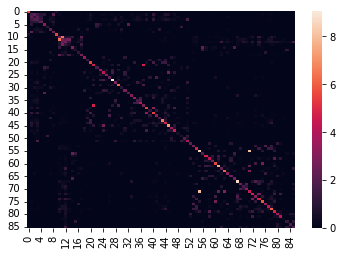

In [20]:
sns.heatmap(sc_conn.weights)

In [21]:
sim = simulator.Simulator(
    model=models.WilsonCowan(variables_of_interest=('E', 'I',), a_e=np.random.uniform(0, 1, 86)),
    connectivity=sc_conn,
    coupling=coupling.Linear(a=np.array([0.01])),
    integrator=integrators.EulerStochastic(dt=0.1, noise=noise.Additive(nsig=np.array([1e-4]))),
    monitors=(monitors.TemporalAverage(period=1),),
    simulation_length=5e3).configure()
(time, data), = sim.run()

In [22]:
data.shape

(5000, 2, 86, 1)

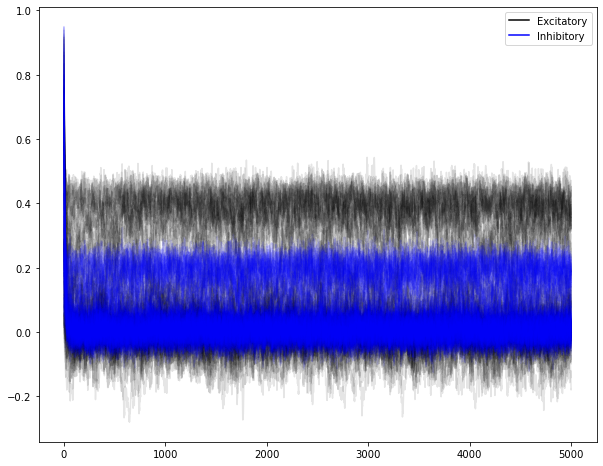

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(time, data[:, 0, :, 0], 'k', alpha=0.1);
plt.plot(time, data[:, 1, :, 0], 'b', alpha=0.1);
plt.legend([Line2D([0], [0], color='k'), Line2D([0], [0], color='b')], ['Excitatory', 'Inhibitory'])

In [24]:
import pickle
with open('./sim_ei_data_5e3_86r.pkl', 'wb') as f_pkl:
    pickle.dump((time, data), f_pkl)

In [20]:
def hrf_balloon(state_var, tau_s=0.8, tau_f=0.4, **kwargs):
    """
    **Parameters** :

    * :math:`\\tau_s`: Dimensionless? exponential decay parameter.
    * :math:`\\tau_f`: Dimensionless? oscillatory parameter.
    * :math:`k_1`    : First Volterra kernel coefficient.
    * :math:`V_0` : Resting blood volume fraction.


    **References** :
 `
    .. [F_2000] Friston, K., Mechelli, A., Turner, R., and Price, C., *Nonlinear
        Responses in fMRI: The Balloon Model, Volterra Kernels, and Other
        Hemodynamics*, NeuroImage, 12, 466 - 477, 2000.
    """
    # return 1/3 * jnp.exp(-0.5*(state_var / tau_s)) * jnp.sin(jnp.sqrt(1 / tau_f - 1 / (4. * tau_s ** 2)) * state_var)
    return 1 / 3. * np.exp(-0.5 * (state_var / tau_s)) * \
           (np.sin(np.sqrt(1. / tau_f - 1. / (4. * tau_s ** 2)) * state_var)) / \
           (np.sqrt(1. / tau_f - 1. / (4. * tau_s ** 2)))

In [32]:
bold_test = hrf_balloon(data[:, 0, :, 0])

In [33]:
bold_test.shape

(1000, 86)

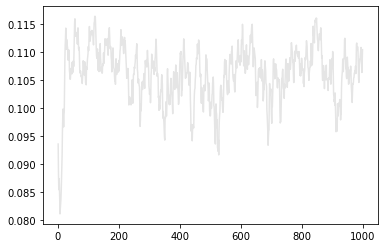

In [34]:
plt.plot(time, bold_test[:, 0], 'k', alpha=0.1);

<AxesSubplot:>

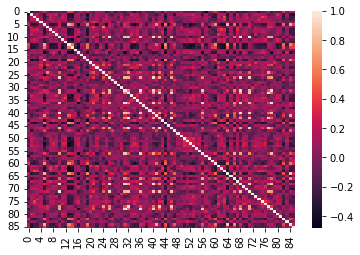

In [35]:
sns.heatmap(np.corrcoef(bold_test.T))

### Simulate BOLD signal

In [65]:
models.WilsonCowan(variables_of_interest=('E + I',))

,value
"P [min, median, max]","[0, 0, 0]"
P dtype,float64
P shape,"(1,)"
"Q [min, median, max]","[0, 0, 0]"
Q dtype,float64
Q shape,"(1,)"
Type,WilsonCowan
"a_e [min, median, max]","[1.2, 1.2, 1.2]"
a_e dtype,float64
a_e shape,"(1,)"


In [27]:
sim_bold = simulator.Simulator(
    model=models.WilsonCowan(variables_of_interest=('E', 'I'), a_e=np.random.uniform(0, 1, 86)),  # try different pars for different regions
    connectivity=sc_conn,
    coupling=coupling.Linear(a=np.array([0.01])),
    integrator=integrators.EulerStochastic(dt=0.1, noise=noise.Additive(nsig=np.array([1e-4]))),
#     monitors=(monitors.TemporalAverage(period=1.),),
    monitors=(monitors.Bold(period=50,),),
    simulation_length=1e4).configure()

(time1, data1), = sim_bold.run()

In [28]:
data1.shape

(200, 2, 86, 1)

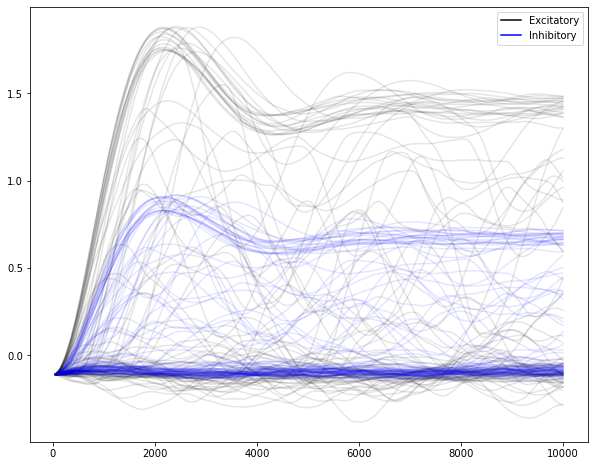

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(time1, data1[:, 0, :, 0], 'k', alpha=0.1);  # excitatory
plt.plot(time1, data1[:, 1, :, 0], 'b', alpha=0.1);  # inhibitory
plt.legend([Line2D([0], [0], color='k'), Line2D([0], [0], color='b')], ['Excitatory', 'Inhibitory'])

In [34]:
import pickle
with open('./data/sc0_bold_sim_data.pkl', 'wb') as f_pkl:
    pickle.dump([time1, data1], f_pkl)

In [78]:
fc_from_sum = np.corrcoef(data_sum[:, 0, :, 0].T)
fc_from_sum.shape

(86, 86)

In [79]:
fc_from_sum

array([[ 1.        ,  0.99981833,  0.99992995, ..., -0.16209516,
        -0.37674415,  0.99995064],
       [ 0.99981833,  1.        ,  0.99991757, ..., -0.1507565 ,
        -0.3675439 ,  0.99979252],
       [ 0.99992995,  0.99991757,  1.        , ..., -0.15706803,
        -0.37060491,  0.99986711],
       ...,
       [-0.16209516, -0.1507565 , -0.15706803, ...,  1.        ,
         0.57667156, -0.16370544],
       [-0.37674415, -0.3675439 , -0.37060491, ...,  0.57667156,
         1.        , -0.38084984],
       [ 0.99995064,  0.99979252,  0.99986711, ..., -0.16370544,
        -0.38084984,  1.        ]])

<AxesSubplot:>

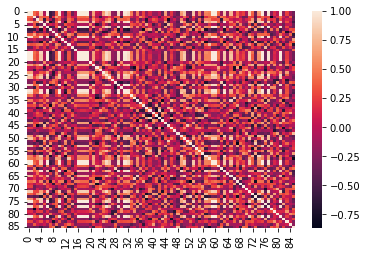

In [30]:
fc_from_e = np.corrcoef(data1[:, 0, :, 0].T)  # Exitatory
fc_from_e.shape
sns.heatmap(fc_from_e)

In [70]:
fc_data0 = scipy.io.loadmat('./data/FCmat_hpf_fs86_gsr_FCcov_concat/100206_concat_fmriclean_hpf_fs86_gsr_FCcov.mat')

<AxesSubplot:>

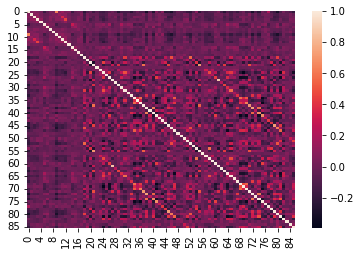

In [71]:
sns.heatmap(fc_data0['C'])